<a href="https://colab.research.google.com/github/nouraoaldawsari/T5/blob/main/Weekly_Project_Noura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

In [426]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [427]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [428]:
data = pd.read_csv('/content/drive/MyDrive/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [430]:
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [431]:
data['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [432]:
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

In [433]:
num = 12316 * 0.2

cols = [col for col in data.columns if data[col].isna().sum() > num]
cols

['Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Work_of_casuality',
 'Fitness_of_casuality']

In [434]:
data.drop(cols, axis=1, inplace=True)

In [435]:
reduced_data = data.dropna()

In [436]:
data.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [437]:
data.fillna(data.mode().iloc[0], inplace=True)
data.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [438]:
data.duplicated().sum() # no duplicated to handle

0

In [439]:
data['Time'] = pd.to_datetime(data['Time'])

<ipython-input-439-8c5306056fcf>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  object        
 7   Type_of_vehicle              12316 non-null  object        
 8   Owner_of_vehicle             12316 non-null  object        
 9   Area_accident_occured        12316 non-null  object        
 10  Lanes_or_Medians             12316 non-null  object        
 11  Road_allignment              12316 non-nu

In [441]:
data.shape

(12316, 28)

In [442]:
data.describe()

Time  Number_of_vehicles_involved  \
count                          12316                 12316.000000   
mean   2024-08-01 14:17:50.768106496                     2.040679   
min              2024-08-01 00:01:00                     1.000000   
25%              2024-08-01 10:31:00                     2.000000   
50%              2024-08-01 15:10:00                     2.000000   
75%              2024-08-01 18:10:00                     2.000000   
max              2024-08-01 23:59:00                     7.000000   
std                              NaN                     0.688790   

       Number_of_casualties  
count          12316.000000  
mean               1.548149  
min                1.000000  
25%                1.000000  
50%                1.000000  
75%                2.000000  
max                8.000000  
std                1.007179

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [443]:
numrical_data = data.select_dtypes(include=['int','float'])
categorical_data = data.select_dtypes(include=['object'])

In [444]:
grouped_data_pie = reduced_data.groupby(['Driving_experience', 'Accident_severity'])['Accident_severity'].count()
grouped_data_pie.head(20)


Driving_experience  Accident_severity
1-2yr               Fatal injury           14
                    Serious Injury        170
                    Slight Injury        1105
2-5yr               Fatal injury           33
                    Serious Injury        293
                    Slight Injury        1637
5-10yr              Fatal injury           27
                    Serious Injury        315
                    Slight Injury        2070
Above 10yr          Fatal injury           21
                    Serious Injury        226
                    Slight Injury        1451
Below 1yr           Fatal injury            4
                    Serious Injury        158
                    Slight Injury         815
No Licence          Serious Injury          7
                    Slight Injury          78
unknown             Serious Injury          2
                    Slight Injury          13
Name: Accident_severity, dtype: int64

In [445]:
fig = px.pie(grouped_data_pie, values='Accident_severity', names='Accident_severity', title='')
fig.show()

In [446]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, Normalizer

In [447]:
enc = OrdinalEncoder()
enc.fit(categorical_data[['Accident_severity','Sex_of_driver']])
enc.categories_
enc.transform(categorical_data[['Accident_severity','Sex_of_driver']])


array([[2., 1.],
       [2., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [2., 0.],
       [2., 1.]])

In [448]:
from sklearn.preprocessing import PolynomialFeatures

In [488]:
fig = px.imshow(categorical_data, text_auto=True)
fig.show()

In [450]:
scalar = StandardScaler()
scaled_n = scalar.fit_transform(numrical_data)
scaled_n

array([[-0.05906077,  0.44864885],
       [-0.05906077,  0.44864885],
       [-0.05906077,  0.44864885],
       ...,
       [-1.51094177, -0.54426386],
       [-0.05906077, -0.54426386],
       [-0.05906077, -0.54426386]])

In [451]:
confusion_matrix = numrical_data.corr()

In [452]:
import plotly.express as px
fig = px.imshow(confusion_matrix, text_auto=True)
fig.show()

In [453]:
grouped_data = data.groupby(['Day_of_week', 'Accident_severity'])['Accident_severity'].count()
grouped_data.head(20)

Day_of_week  Accident_severity
Friday       Fatal injury           16
             Serious Injury        313
             Slight Injury        1712
Monday       Fatal injury           12
             Serious Injury        204
             Slight Injury        1465
Saturday     Fatal injury           37
             Serious Injury        245
             Slight Injury        1384
Sunday       Fatal injury           35
             Serious Injury        190
             Slight Injury        1242
Thursday     Fatal injury           22
             Serious Injury        272
             Slight Injury        1557
Tuesday      Fatal injury           17
             Serious Injury        257
             Slight Injury        1496
Wednesday    Fatal injury           19
             Serious Injury        262
Name: Accident_severity, dtype: int64

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: xlabel='Day_of_week,Accident_severity'>

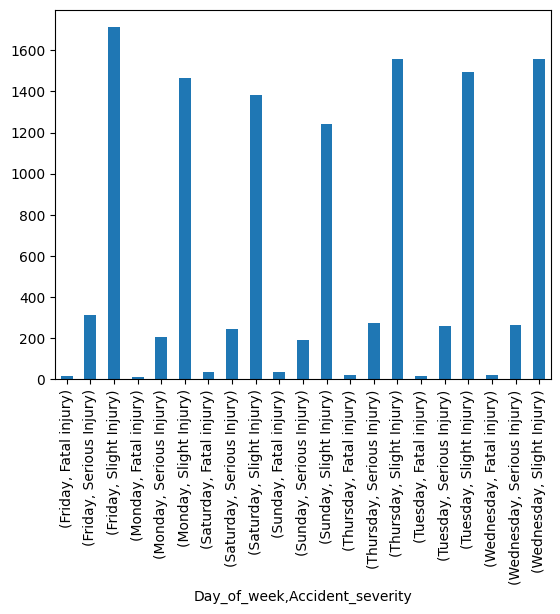

In [454]:
grouped_data.plot(kind='bar')

In [455]:
data.dropna(inplace= True)

In [456]:
grouped_data = data.groupby('Sex_of_casualty')['Accident_severity']

In [425]:
fig = px.density_heatmap(grouped_data)
fig.show()

In [457]:
fig = px.scatter(x=categorical_data['Sex_of_driver'], y=categorical_data['Accident_severity'])
fig.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [458]:
from sklearn.model_selection import train_test_split
X = data[['Cause_of_accident','Driving_experience']]
y = data['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [459]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()

In [460]:
from sklearn.pipeline import Pipeline

steps = [
    ('scaler', OneHotEncoder(handle_unknown='ignore')),
    ('model', LogisticRegression())
]

pipeline = Pipeline(steps)

In [461]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', OneHotEncoder(handle_unknown='ignore')),
                ('model', LogisticRegression())])

In [462]:
pipeline.fit(X_test, y_test)

Pipeline(steps=[('scaler', OneHotEncoder(handle_unknown='ignore')),
                ('model', LogisticRegression())])

In [463]:
y_test.to_numpy()

array(['Slight Injury', 'Slight Injury', 'Serious Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

In [464]:
y_pred = pipeline.predict(X_test)

In [465]:
from sklearn.metrics import mean_squared_error

#### Decision Tree Classifier

In [466]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [467]:
steps = [
    ('scaler', OneHotEncoder(handle_unknown='ignore')),
    ('model', DecisionTreeClassifier())
]

pipeline = Pipeline(steps)

In [468]:
pipeline.fit(X_train, y_train)
pipeline.fit(X_test, y_test)

Pipeline(steps=[('scaler', OneHotEncoder(handle_unknown='ignore')),
                ('model', DecisionTreeClassifier())])

In [469]:
y_pred = pipeline.predict(X_test)

#### Support Vector Machine (SVM)

In [470]:
from sklearn.svm import SVC
svm = SVC()

In [471]:
steps = [
    ('scaler', OneHotEncoder()),
    ('model', SVC(decision_function_shape='ovo'))
]

pipeline = Pipeline(steps)

In [472]:
pipeline.fit(X_train, y_train)
pipeline.fit(X_test, y_test)

Pipeline(steps=[('scaler', OneHotEncoder()),
                ('model', SVC(decision_function_shape='ovo'))])

In [473]:
y_pred = pipeline.predict(X_test)
y_pred

array(['Slight Injury', 'Slight Injury', 'Slight Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

In [474]:
accuracy_score(y_test, y_pred)

0.8370771312584574

#### K-Neighbors Classifier

In [475]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [476]:
from sklearn.pipeline import Pipeline

steps = [
    ('scaler', OneHotEncoder()),
    ('model', KNeighborsClassifier())
]

pipeline = Pipeline(steps)

In [477]:
pipeline.fit(X_train, y_train)
pipeline.fit(X_test, y_test)

Pipeline(steps=[('scaler', OneHotEncoder()), ('model', KNeighborsClassifier())])

In [478]:
y_pred = pipeline.predict(X_test)

In [479]:
accuracy_score(y_test, y_pred)

0.8362652232746955

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [480]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [481]:
accuracy_score(y_test, y_pred)

0.8362652232746955

In [482]:
confusion_matrix = confusion_matrix(y_test, y_pred)
fig = px.imshow(confusion_matrix, text_auto=True)
fig.show()

In [483]:
f1_score(y_test, y_pred, average='macro')

0.30716241702975705

In [484]:
f1_score(y_test, y_pred, average='micro')

0.8362652232746955

In [485]:

f1_score(y_test, y_pred, average='weighted')


0.7634816933642706

## saving data

In [486]:
data.to_csv('Week2_Project', index = False)

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Data shows reduces in of fatal collisions if the driver experience above 10